In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('../data/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
y = data["output"]
X = data.drop('output',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [4]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 118, 0: 94})

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
m1 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 9 35]
 [ 0 47]]


Accuracy of Extreme Gradient Boost: 61.53846153846154 

              precision    recall  f1-score   support

           0       1.00      0.20      0.34        44
           1       0.57      1.00      0.73        47

    accuracy                           0.62        91
   macro avg       0.79      0.60      0.53        91
weighted avg       0.78      0.62      0.54        91



In [7]:
m2 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[33 11]
 [ 5 42]]


Accuracy of K-NeighborsClassifier: 82.41758241758241 

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [8]:
m3 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[34 10]
 [ 4 43]]


Accuracy of Support Vector Classifier: 84.61538461538461 

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



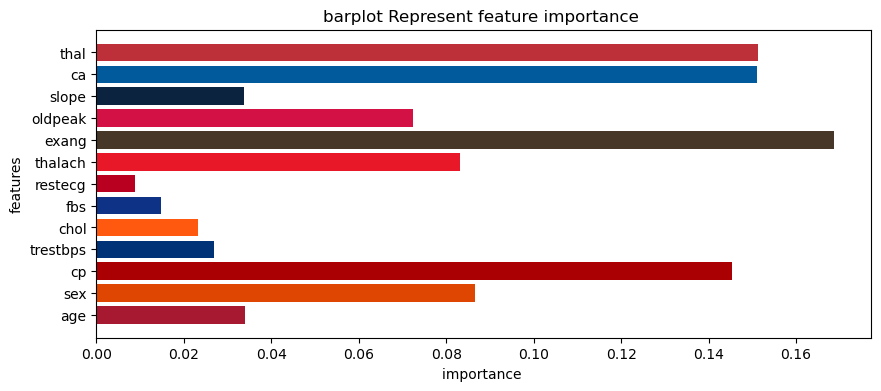

In [9]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'], color=['#A71930', '#DF4601', '#AB0003', '#003278', '#FF5910', '#0E3386', '#BA0021', '#E81828', '#473729', '#D31145', '#0C2340', '#005A9C', '#BD3039', '#EB6E1F', '#C41E3A', '#33006F', '#C6011F', '#004687', '#CE1141', '#134A8E', '#27251F', '#FDB827', '#0C2340', '#FD5A1E', '#00A3E0', '#ffc52f', '#003831', '#005C5C', '#E31937', '#8FBCE6'])
plt.show()

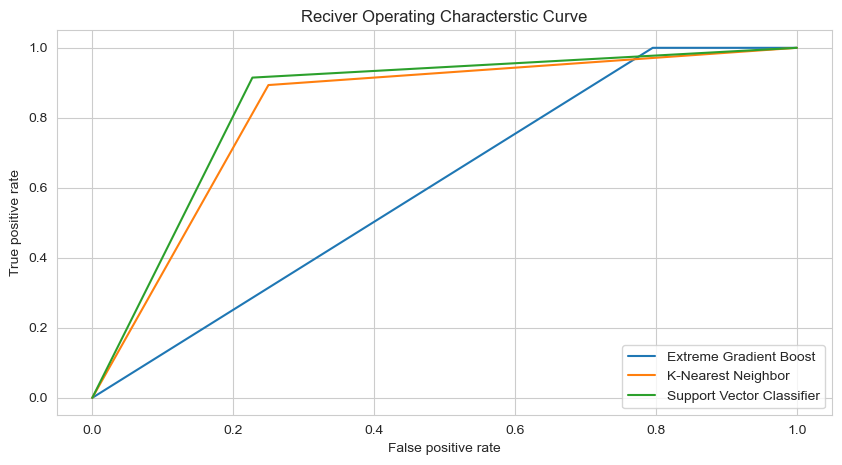

In [10]:
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [11]:
model_ev = pd.DataFrame({'Model': ['Extreme Gradient Boost',
                    'K-Nearest Neighbour','Support Vector Machine'], 'Accuracy': [xgb_acc_score*100,knn_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Extreme Gradient Boost,61.538462
1,K-Nearest Neighbour,82.417582
2,Support Vector Machine,84.615385


In [12]:
prediction = svc.predict(np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]))
prediction

array([1], dtype=int64)

In [14]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_data(data):

    # Categorical Features
    categorical_features = ['cp', 'restecg', 'thall']
    df = pd.get_dummies(data, columns=categorical_features)

    return df

In [15]:
data = pd.read_csv('../data/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
categorical_features = ['cp', 'restecg', 'thall']
pd.get_dummies(data, columns=categorical_features)


,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,0,0,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,...,False,True,False,False,True,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,...,True,False,False,True,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,...,True,False,False,False,True,False,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,...,False,False,False,False,True,False,False,False,False,True
299,45,1,110,264,0,132,0,1.2,1,0,...,False,False,True,False,True,False,False,False,False,True
300,68,1,144,193,1,141,0,3.4,1,2,...,False,False,False,False,True,False,False,False,False,True
301,57,1,130,131,0,115,1,1.2,1,1,...,False,False,False,False,True,False,False,False,False,True


In [37]:
preprocess_data(data).iloc[0:2,:]

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,0,0,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,...,False,True,False,False,True,False,False,False,True,False
